In [0]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [0]:
# Mount to Google drive to get data
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!pip install pyshp

In [0]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

In [0]:
%matplotlib inline

In [0]:
shp_path = "/content/data/Counties.shp"
sf = shp.Reader(shp_path)

In [0]:
sf.records()[0]

Record #0: ['Albany', 'ALBA', '974099', 292594, 294565, 304204, 'N', 'East', '', b'', datetime.date(2017, 11, 10), '001', '010000', 532.791778831]

In [0]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [0]:
df = read_shapefile(sf)
df.shape

(62, 15)

In [0]:
df[df.NAME == 'Washington']

,NAME,ABBREV,GNIS_ID,POP1990,POP2000,POP2010,NYC,SP_ZONE,DOS_LL,DOSLL_DATE,DATEMOD,COUNTYFIPS,SWIS,CALC_SqMi,coords
54,Washington,WASH,974155,59330,61042,63216,N,East,,b'',2017-11-10,115,530000,845.855708,"[(630545.5016999999, 4850934.2498), (630568.98..."


In [0]:
rawdata = pd.read_csv("/content/results-20191210-205620.csv")

In [0]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

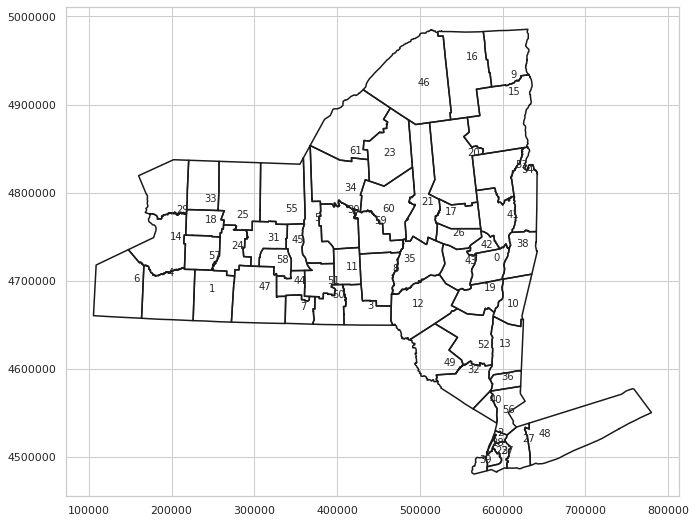

In [0]:
plot_map(sf)

In [0]:
def plot_map_fill(ids, sf, x_lim = None, y_lim = None, figsize = (11,9), color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    for id in ids:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon, y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

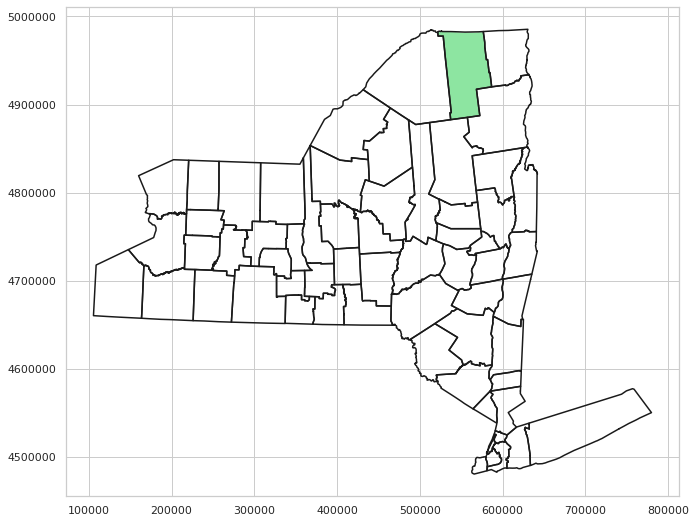

In [0]:
plot_map_fill([16], sf, color='g')

In [0]:
def calc_color(data, color=None):
    if color == 1: 
        color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; 
        colors = 'Purples';
    elif color == 2: 
        color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
        colors = 'YlGnBu';
    elif color == 3: 
        color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd', '#969696','#636363','#252525']; 
        colors = 'Greys';
    elif color == 9: 
        color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000']
    else:            
        color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
        colors = 'YlOrBr';

    new_data, bins = pd.qcut(data, 6, retbins=True, labels=list(range(6)))
    color_ton = []

    for val in new_data:
        color_ton.append(color_sq[val]) 
    if color != 9:
        colors = sns.color_palette(colors, n_colors=6)
        sns.palplot(colors, 0.9)

    return color_ton, bins;

def plot_comunas_data(sf, title, counties, data=None, color=None, print_id=False):
    # Plot map with selected comunes, using specific color
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)

    county_id = []
    for name in counties: 
        county_id.append(df[df.NAME == name.title()].index.values[0])
    
    plot_map_fill_multiples_ids_tone(sf, data, title, county_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

In [0]:
def plot_map_fill_multiples_ids_tone(sf, data, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)

    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])

        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)

    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

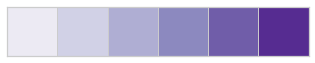

<Figure size 792x648 with 0 Axes>

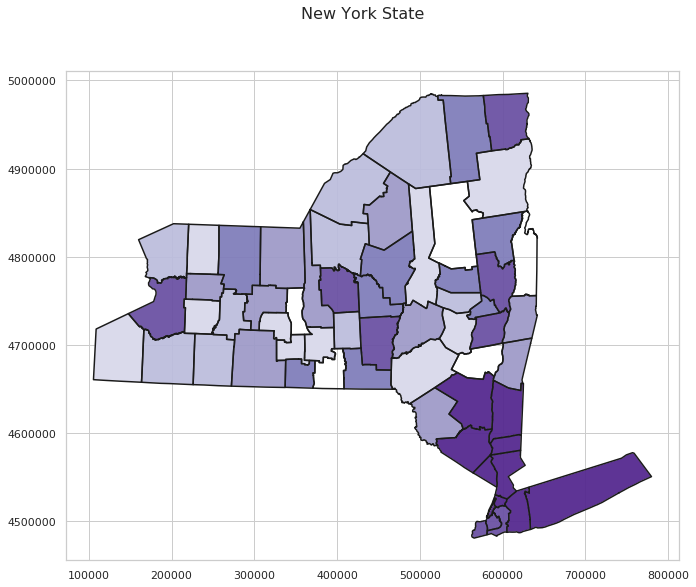

In [0]:
counties = rawdata.Hospital_County.values.tolist()
data = rawdata.avg_total_charges_per_day.values.tolist()
data = [d/max(data) for d in data]
print_id = False # The shape id will be printed
color_pallete = 1 # 'Purples'
plot_comunas_data(sf, 'New York State', counties, data, color_pallete, print_id)

In [0]:
set2 = set(rawdata.Hospital_County.values.tolist())

In [0]:
print(set1 - set2)

{'Washington', 'Seneca', 'New York', 'Tioga', 'Greene', 'Hamilton'}
